In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')
raw_data1=pd.read_csv("heart.csv")
raw_data2=pd.read_csv("o2Saturation.csv")


In [15]:
data = pd.merge(raw_data1, raw_data2, left_index=True, right_index=True)

In [19]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
# data=raw_data.copy()
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.shape

(303, 14)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trtbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalachh,0,0.0
exng,0,0.0
oldpeak,0,0.0


In [21]:
data_numerical = data[['age','trtbps','chol','thalachh','oldpeak']] # not including slope as i don't think its useful
data_categorical = data[['sex','cp','fbs','restecg','exng','caa','thall','output']]

In [22]:
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.202463,-0.542167
1,trtbps,0.713768,0.929054
2,chol,1.143401,4.505423
3,thalachh,-0.537410,-0.061970
4,oldpeak,1.269720,1.575813


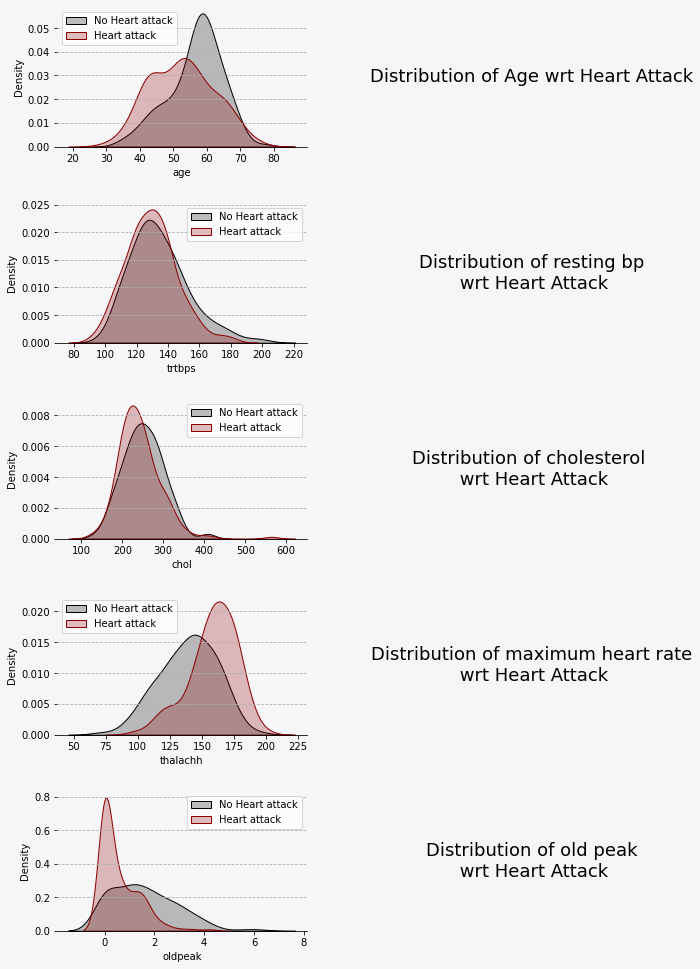

In [26]:
fig = plt.figure(figsize=(17,17))
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
# data_numerical = data[['age','trestbps','chol','thalach','oldpeak']]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
#ax0
sns.kdeplot(ax=ax0,x=data.loc[data['output']==0]['age'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['output']==1]['age'],color='darkred',label='Heart attack',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')
#ax1
ax1.text(0.5,0.5,'Distribution of Age wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax2
sns.kdeplot(ax=ax2,x=data.loc[data['output']==0]['trtbps'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['output']==1]['trtbps'],color='darkred',label='Heart attack',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')
#ax3
ax3.text(0.5,0.5,'Distribution of resting bp\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax4
sns.kdeplot(ax=ax4,x=data.loc[data['output']==0]['chol'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['output']==1]['chol'],color='darkred',label='Heart attack',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')
#ax5
ax5.text(0.5,0.5,'Distribution of cholesterol \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax6
sns.kdeplot(ax=ax6,x=data.loc[data['output']==0]['thalachh'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax6,x=data.loc[data['output']==1]['thalachh'],color='darkred',label='Heart attack',shade=True)
ax6.legend(loc = 'upper left')
ax6.grid(linestyle='--', axis='y')
#ax7
ax7.text(0.5,0.5,'Distribution of maximum heart rate\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax8
sns.kdeplot(ax=ax8,x=data.loc[data['output']==0]['oldpeak'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax8,x=data.loc[data['output']==1]['oldpeak'],color='darkred',label='Heart attack',shade=True)
ax8.legend(loc = 'upper right')
ax8.grid(linestyle='--', axis='y')
#ax9
ax9.text(0.5,0.5,'Distribution of old peak\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

# removing labels
axes1=[ax1,ax3,ax5,ax7,ax9]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
    
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

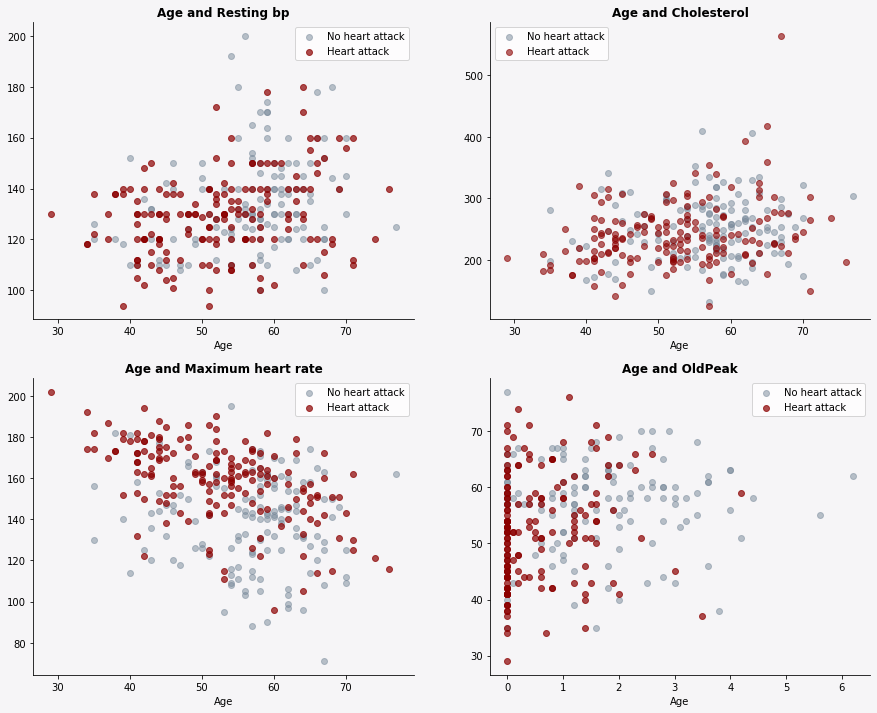

In [27]:
# Matplotlib because i want more control over my scatterplot colors.
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3=  fig.add_subplot(gs[1,1])
axes=[ax0,ax1,ax2,ax3]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

# Age and Resting bp
ax0.scatter(x='age',y='trtbps',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax0.scatter(x='age',y='trtbps',data=data[data['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax0.legend()
ax0.set_xlabel('Age')
ax0.set_title('Age and Resting bp',fontweight='bold')

# Age and Cholesterol
ax1.scatter(x='age',y='chol',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax1.scatter(x='age',y='chol',data=data[data['output']==1],color='darkred',alpha=0.6,label = 'Heart attack')
ax1.legend()
ax1.set_xlabel('Age')
ax1.set_title('Age and Cholesterol',fontweight='bold')

# Age and Maximum heart rate
ax2.scatter(x='age',y='thalachh',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax2.scatter(x='age',y='thalachh',data=data[data['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax2.legend()
ax2.set_xlabel('Age')
ax2.set_title('Age and Maximum heart rate',fontweight='bold')

# Age and Oldpeak
ax3.scatter(x='oldpeak',y='age',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax3.scatter(x='oldpeak',y='age',data=data[data['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax3.legend()
ax3.set_xlabel('Age')
ax3.set_title('Age and OldPeak',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

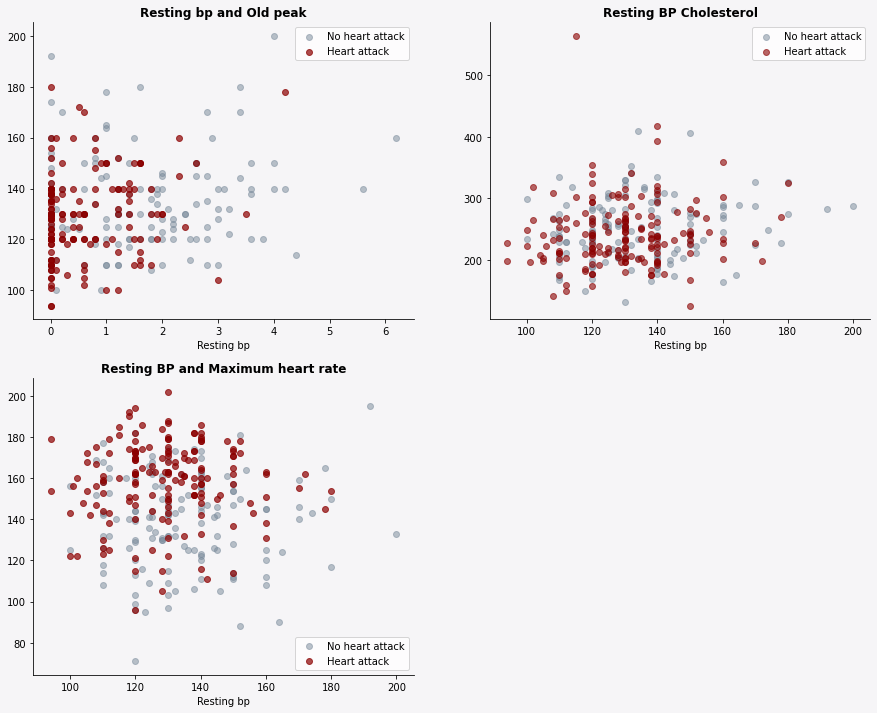

In [28]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3=  fig.add_subplot(gs[1,1])
axes=[ax0,ax1,ax2,ax3]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

# Resting bp and Old peak
ax0.scatter(x='oldpeak',y='trtbps',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax0.scatter(x='oldpeak',y='trtbps',data=data[data['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax0.set_xlabel('Resting bp')
ax0.legend()
ax0.set_title('Resting bp and Old peak',fontweight='bold')

# Resting BP Cholesterol
ax1.scatter(x='trtbps',y='chol',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax1.scatter(x='trtbps',y='chol',data=data[data['output']==1],color='darkred',alpha=0.6,label = 'Heart attack')
ax1.set_xlabel('Resting bp')
ax1.legend()
ax1.set_title('Resting BP Cholesterol',fontweight='bold')

# Resting BP and Maximum heart rate
ax2.scatter(x='trtbps',y='thalachh',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax2.scatter(x='trtbps',y='thalachh',data=data[data['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax2.set_xlabel('Resting bp')
ax2.legend()
ax2.set_title('Resting BP and Maximum heart rate',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
ax3.set_visible(False)

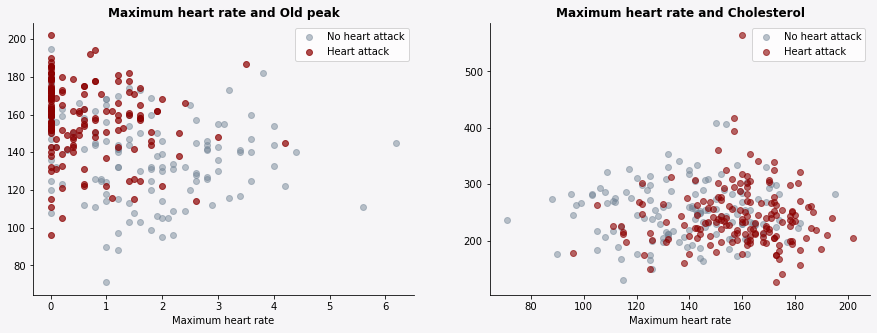

In [29]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

# Maximum heart rate and Old peak
ax0.scatter(x='oldpeak',y='thalachh',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax0.scatter(x='oldpeak',y='thalachh',data=data[data['output']==1],color='darkred',alpha=0.7,label = 'Heart attack')
ax0.set_xlabel('Maximum heart rate')
ax0.legend()
ax0.set_title('Maximum heart rate and Old peak',fontweight='bold')

# Resting BP Cholesterol
ax1.scatter(x='thalachh',y='chol',data=data[data['output']==0],alpha=0.5,color='lightslategrey',label = 'No heart attack')
ax1.scatter(x='thalachh',y='chol',data=data[data['output']==1],color='darkred',alpha=0.6,label = 'Heart attack')
ax1.set_xlabel('Maximum heart rate')
ax1.legend()
ax1.set_title('Maximum heart rate and Cholesterol',fontweight='bold')

#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)

Text(-1.7, 1.1, 'Heatmap of Numerical Variables')

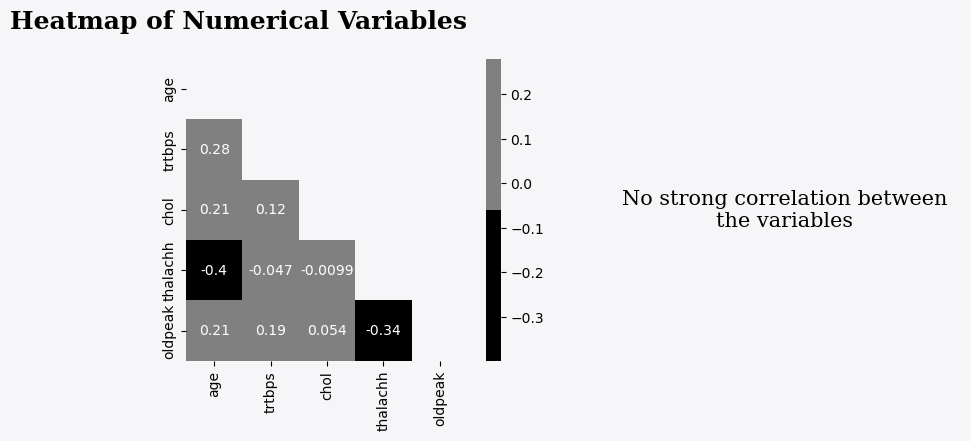

In [30]:
fig=plt.figure(figsize=(10,4),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
matrix = np.triu(data_numerical.corr())
colors=['black','grey']
sns.heatmap(ax=ax0,data=data_numerical.corr(), annot=True, mask=matrix,cmap=colors)
ax1.text(0.5,0.5,'No strong correlation between\nthe variables',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Numerical Variables',fontsize=18,fontweight='bold',fontfamily='serif') 

<Figure size 2000x1500 with 0 Axes>

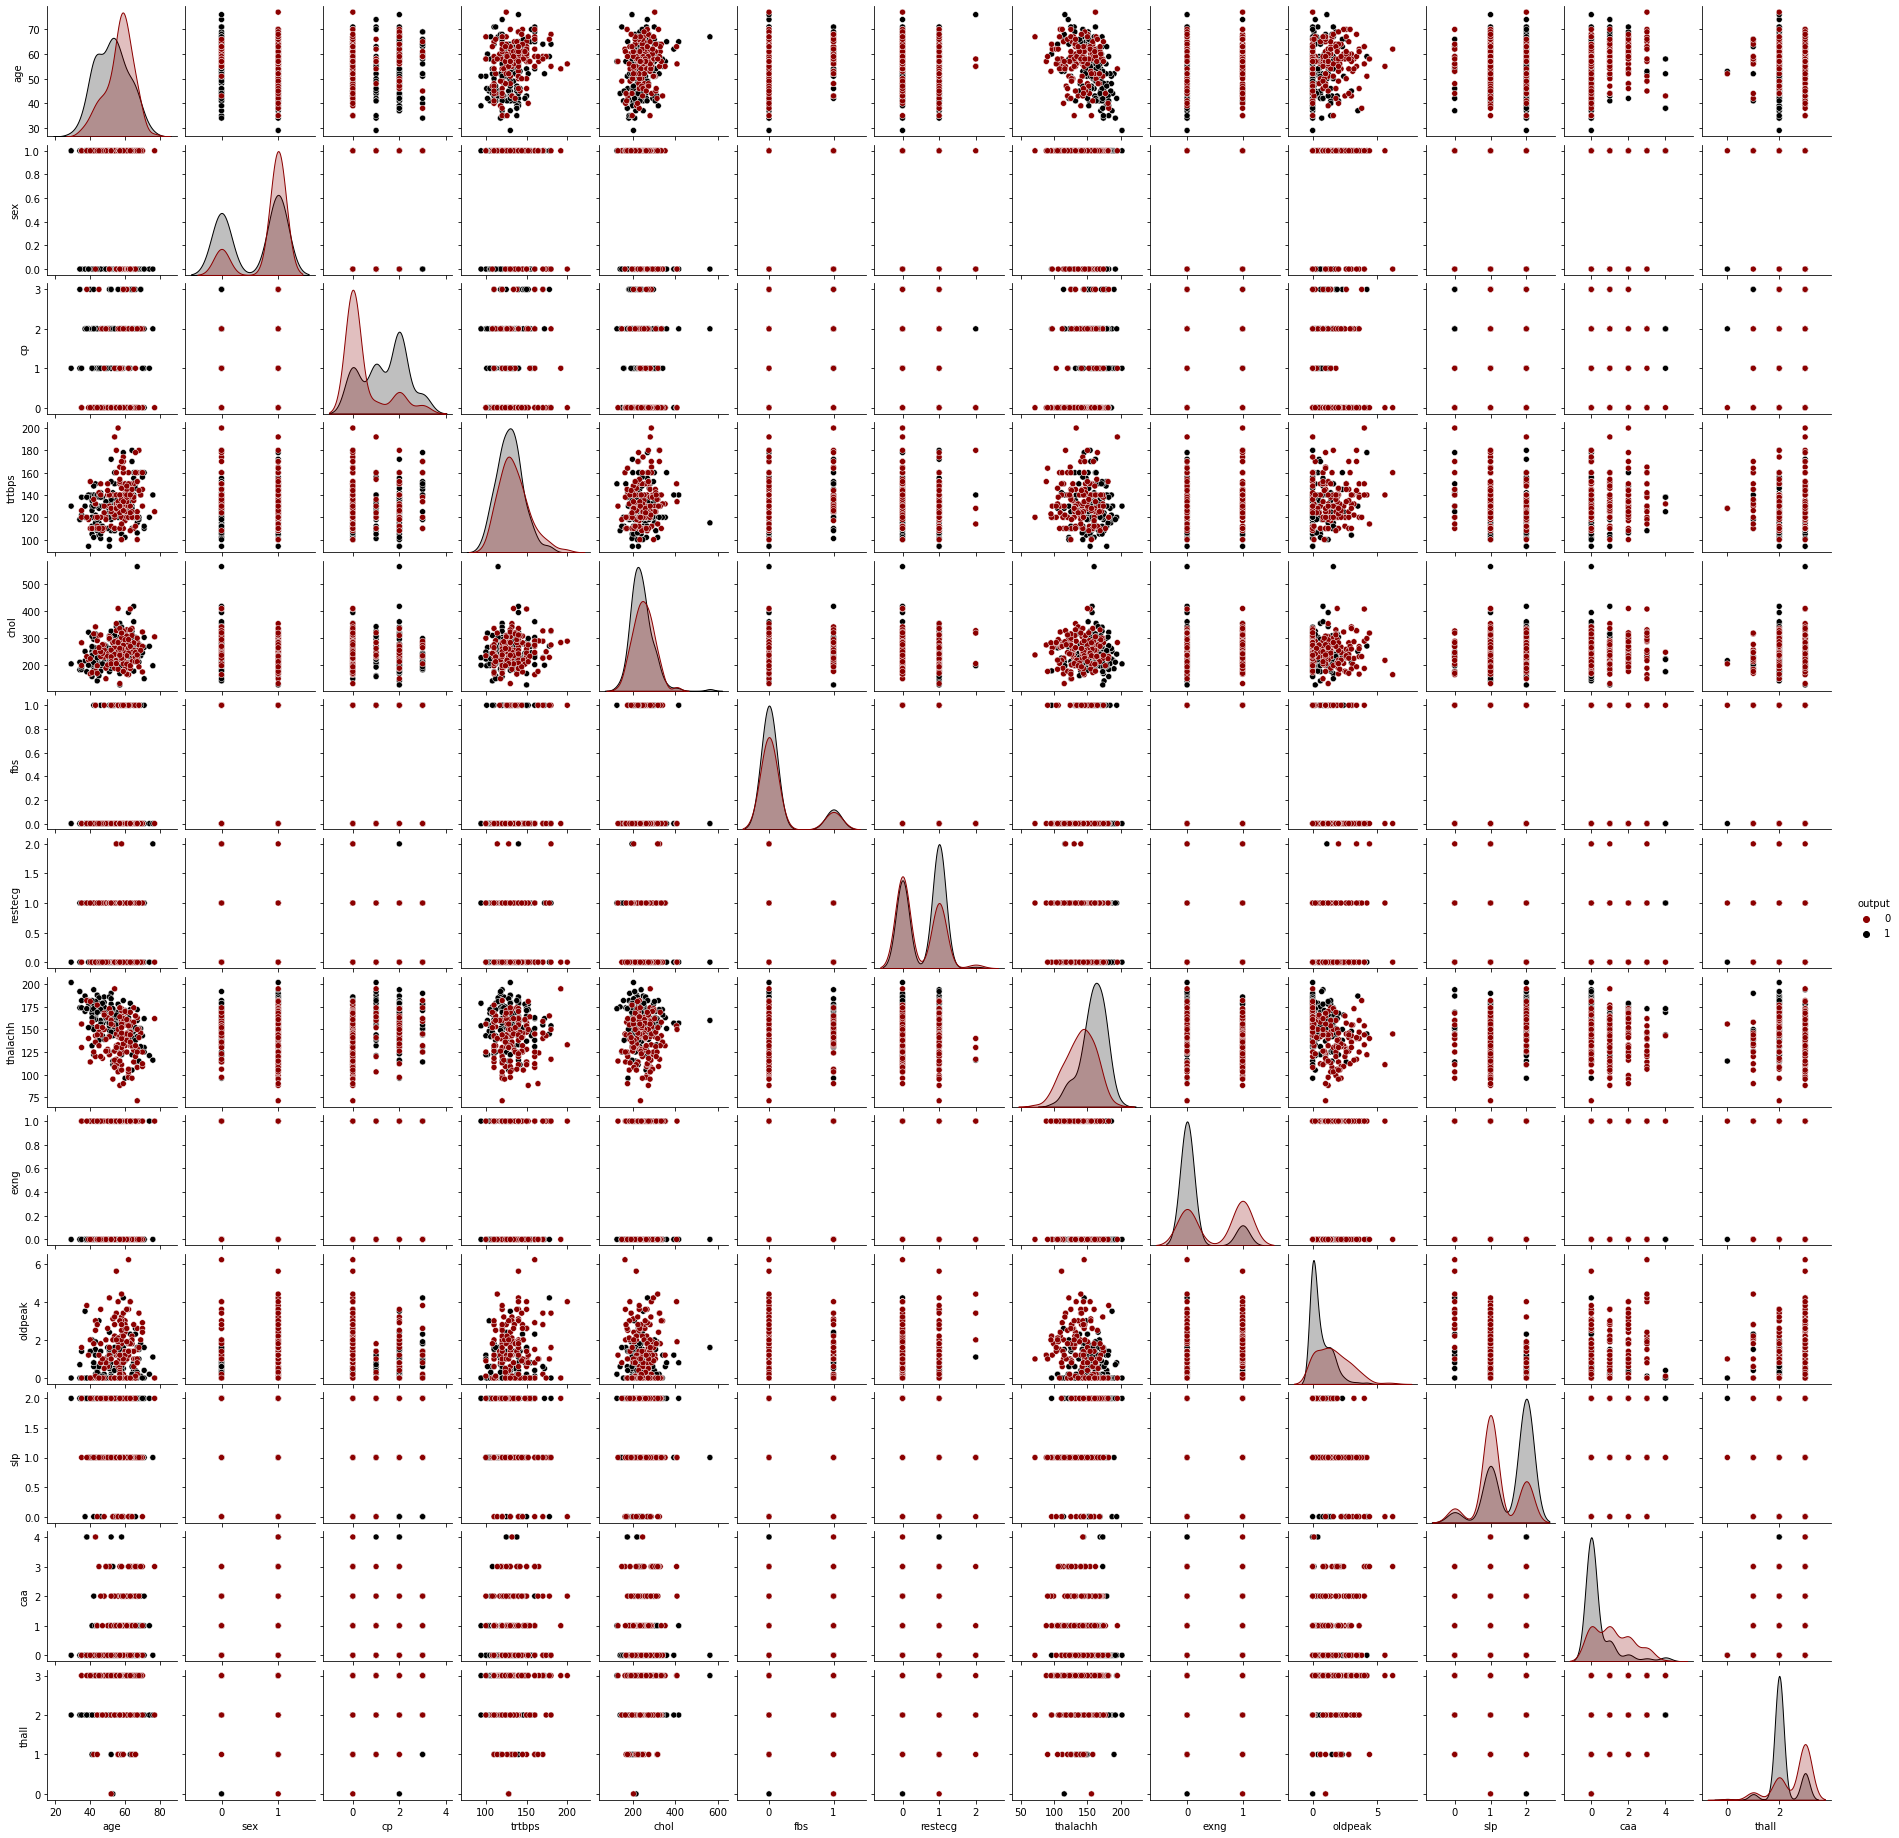

In [31]:
fig=plt.figure(figsize=(20,15),dpi=100)
colors=['darkred','black']
sns.pairplot(data=data,hue='output',size=2,palette=colors)
plt.show()

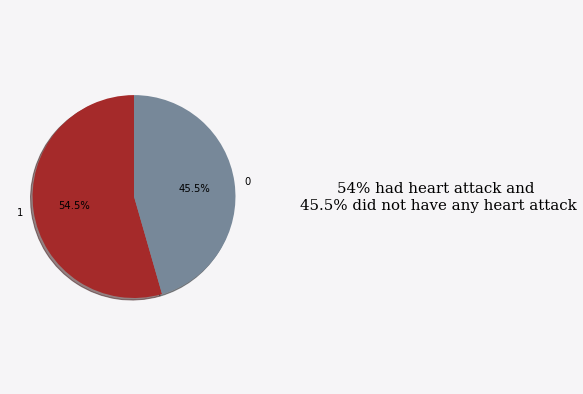

In [32]:
# Our Target Variable
colors=['brown','lightslategrey']
fig=plt.figure(figsize=(10,7))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
fig.patch.set_facecolor(background_color) 
labels=data_categorical['output'].value_counts().index
values=data_categorical['output'].value_counts()

ax0.pie(values,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 90)

ax1.text(0.5,0.5,'54% had heart attack and \n45.5% did not have any heart attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)

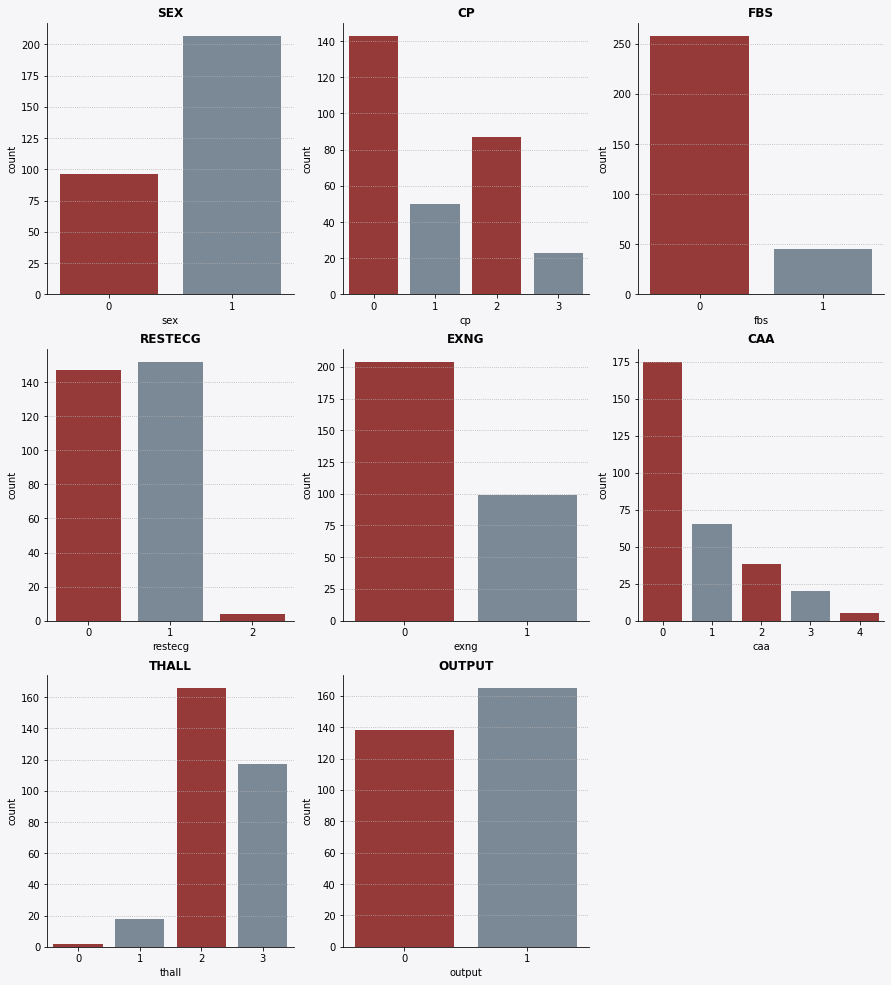

In [33]:
colors=['brown','lightslategrey']
fig=plt.figure(figsize=(15,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette=colors)

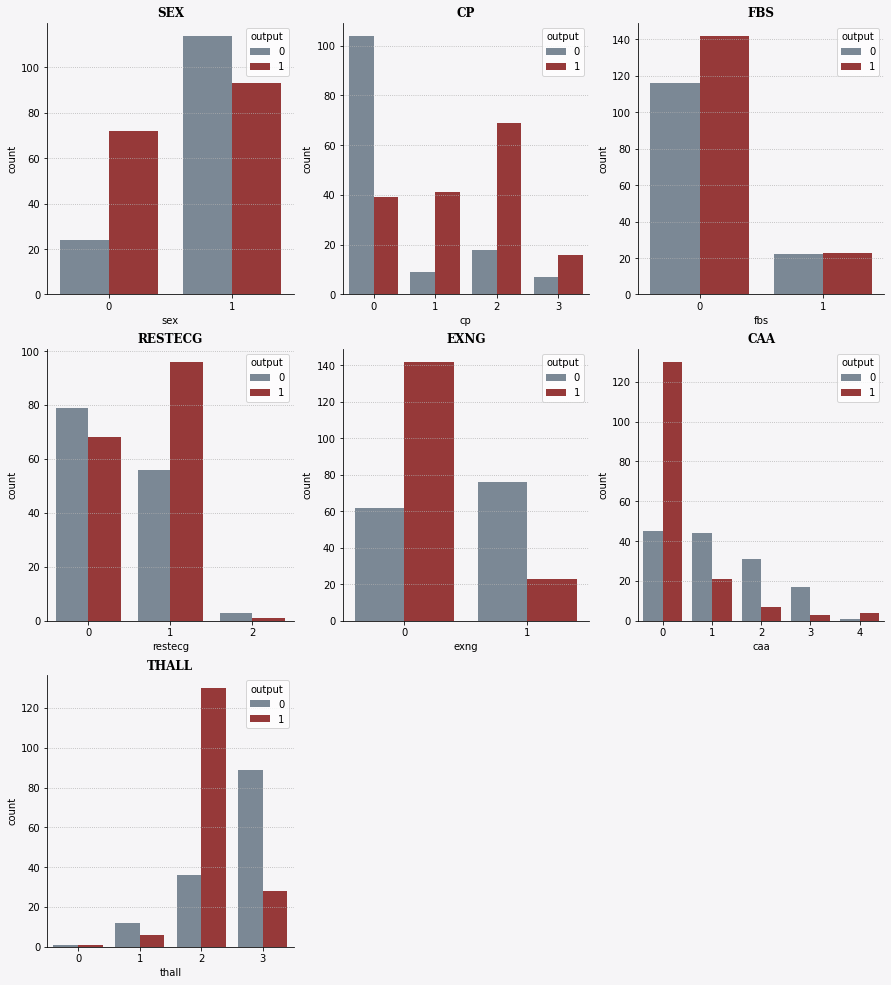

In [34]:
data_cat=data_categorical[['sex','cp','fbs','restecg','exng','caa','thall']]
fig=plt.figure(figsize=(15,23))
colors=['lightslategrey','brown']
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,3,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette=colors,hue=data['output'])

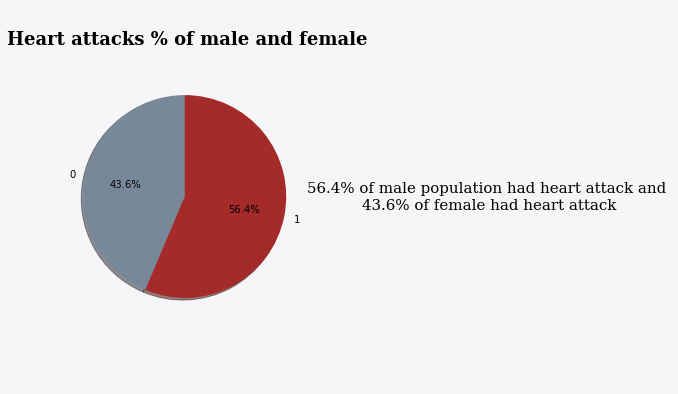

In [35]:
sum_target = data['output'].sum()
data_sex = pd.pivot_table(data=data[data['output']==1],index=data['sex'],values='output',aggfunc='count').reset_index()
data_sex['percentage'] = (data_sex['output']*100)/sum_target
colors=['lightslategrey','brown']
fig=plt.figure(figsize=(10,7))
gs=fig.add_gridspec(1,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
fig.patch.set_facecolor(background_color) 
labels=data_sex['sex']
values=data_sex['percentage']
ax0.pie(values,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 90)

ax1.text(0.5,0.5,'56.4% of male population had heart attack and \n43.6% of female had heart attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
plt.text(-1.4,0.9,'Heart attacks % of male and female',fontsize=18,fontweight='bold',fontfamily='serif')   
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
ax1.tick_params(left=False, bottom=False)

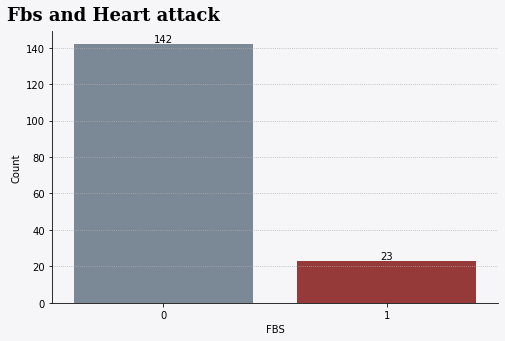

In [36]:
fig,axes=plt.subplots(1,1,figsize=(8,5))
backgroundcolor='#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)
data_fbs = pd.pivot_table(data=data[data['output']==1],index=data['fbs'],values='output',aggfunc='count').reset_index()
sns.barplot(ax=axes,x=data_fbs['fbs'],y=data_fbs['output'],palette=colors)
for idx,val in enumerate(data_fbs['output']):
    axes.text( idx,val+1, round(val, 1), horizontalalignment='center')
axes.grid(linestyle=':',axis='y')
axes.set_xlabel('FBS')
axes.set_ylabel('Count')
plt.text(-0.7,155,'Fbs and Heart attack',fontsize=18,fontweight='bold',fontfamily='serif')
for i in ['top','right']:
    axes.spines[i].set_visible(False)

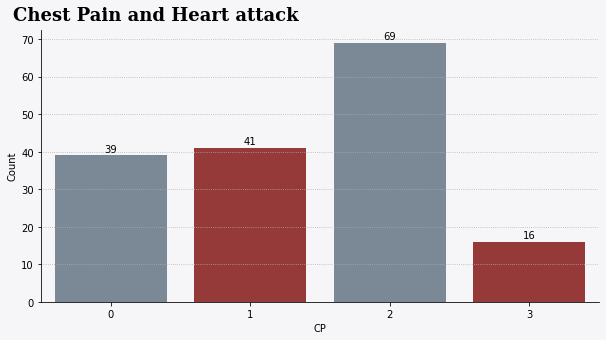

In [37]:
fig,axes=plt.subplots(1,1,figsize=(10,5))
backgroundcolor='#f6f5f7'
fig.patch.set_facecolor(background_color)
axes.set_facecolor(background_color)
data_cp = pd.pivot_table(data=data[data['output']==1],index=data['cp'],values='output',aggfunc='count').reset_index()
sns.barplot(ax=axes,x=data_cp['cp'],y=data_cp['output'],palette=colors)
for idx,val in enumerate(data_cp['output']):
    axes.text( idx,val+1, round(val, 1), horizontalalignment='center')
axes.grid(linestyle=':',axis='y')
axes.set_xlabel('CP')
axes.set_ylabel('Count')
plt.text(-0.7,75,'Chest Pain and Heart attack',fontsize=18,fontweight='bold',fontfamily='serif')

for i in ['top','right']:
    axes.spines[i].set_visible(False)

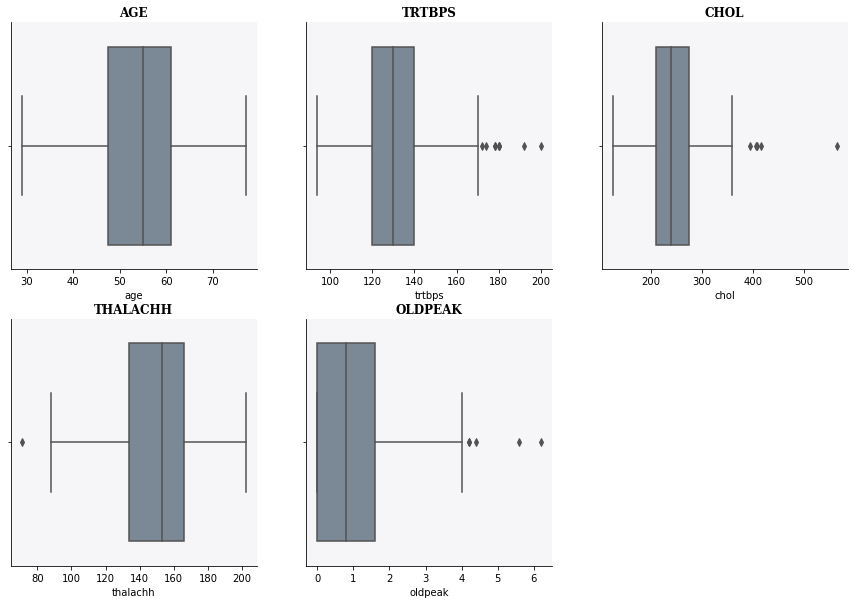

In [38]:
plt.figure(figsize=(15,10))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for idx,val in enumerate(data_numerical.columns):
    ax=plt.subplot(2,3,idx+1)
    sns.boxplot(data_numerical[val],palette=colors)
    ax.set_facecolor(background_color)
    ax.set_title(val.upper(),fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)

### Data Preprocessing

In [39]:
# Before training the models we are going to drop the slope and target columns.
data_target=data['output']
data.drop(columns=['slp','output'],inplace=True)

In [40]:
# One-Hot encoding of Categorical Variables
data_dummies=data[['sex','cp','fbs','restecg','exng','caa','thall']]
data_dummies= pd.get_dummies(data_dummies,columns=['sex','cp','fbs','restecg','exng','caa','thall'])

In [41]:
# Merging the dummy variables and our original data
data.drop(columns=['sex','cp','fbs','restecg','exng','caa','thall'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')
data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,exng_1,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [42]:
# Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_target,test_size=0.3,random_state=42)

In [43]:
# Standardizing the training and testing data.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [45]:
#https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b
colors=['black','grey']
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,x_test,y_test,cmap='rocket_r')
    metrics.plot_roc_curve(model, x_test, y_test)    

Testing Score 
 0.8461538461538461


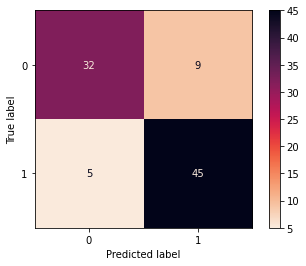

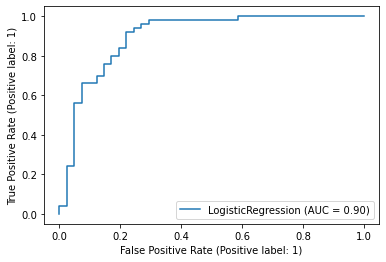

In [46]:
# Logistic Regression
lg_reg=LogisticRegression()

Model(lg_reg)

Testing Score 
 0.7582417582417582


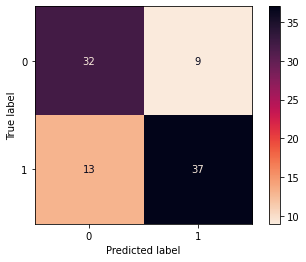

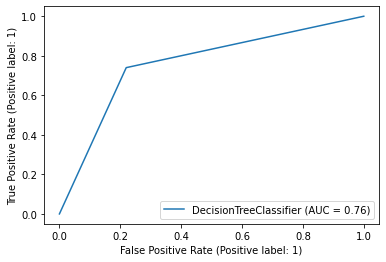

In [47]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)

Testing Score 
 0.8351648351648352


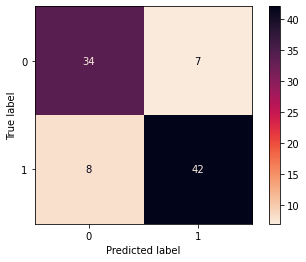

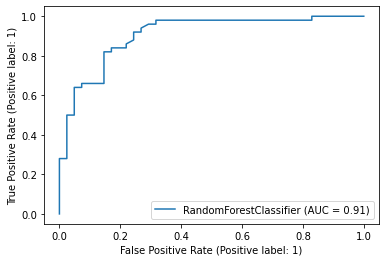

In [48]:
#Regression Trees
reg_tree = RandomForestClassifier()
Model(reg_tree)